#Plotc

Plotc is a collection of convenience functions to facilitate plotting and visualization of 2D data. The actual plotting is carried out using matplotlib's pyplot, which is outstanding. Plotc just makes your life easier - there are a bunch of steps you often have to repeat to get to a half-decent plot, plotc does those for you. In this manual, we will go through some of the ways in which we can use this module.

In [1]:
%matplotlib inline
import plotc
import numpy as np

Plotc loads pyplot, so it is possible to access the module as plotc.plt.

Most of the functions return the axis being plotted on, and the colorbar if any.

#Functions

##colorplot

This function is used to create 2D plots of data using pyplot.pcolormesh. Let's try it on a simple array.

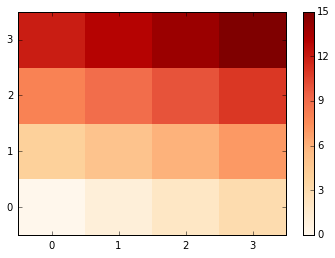

In [2]:
a=np.arange(16).reshape(4,4)
plotc.colorplot(a);

There are lots of customizable options, which we will go into. For the time being, note how it chose a colormap on its own. The colormap choses depends on your data. For example:

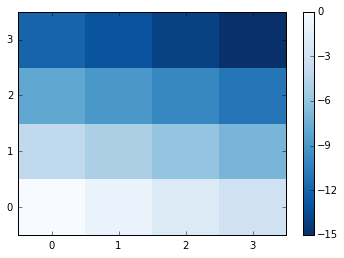

In [29]:
plotc.colorplot(-a);

If the data is positive-definite, the colormap goes from white to red. If it is negative definite, it goes from blue to white. If it ranges from negative to positive, it goes from blue to red with white at zero.

x and y ranges can be specified inline as keyword arguments.

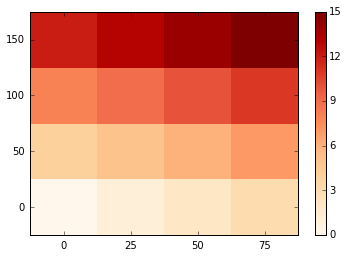

In [30]:
a=np.arange(16).reshape(4,4)
x=np.linspace(0,100,4,endpoint=False)
y=np.linspace(0,200,4,endpoint=False)
plotc.colorplot(a,x=x,y=y);

##spectrumplot

This is a wrapper around colorplot. Despite the name, it doesn't actually plot the spectrum, it merely fftshifts the given array and the axes if they are naturally ordered. If no axis arrays are specified, it creates default axes using the spectrum's shape and fftshifts them appropriately, so that zero frequency is at the center.

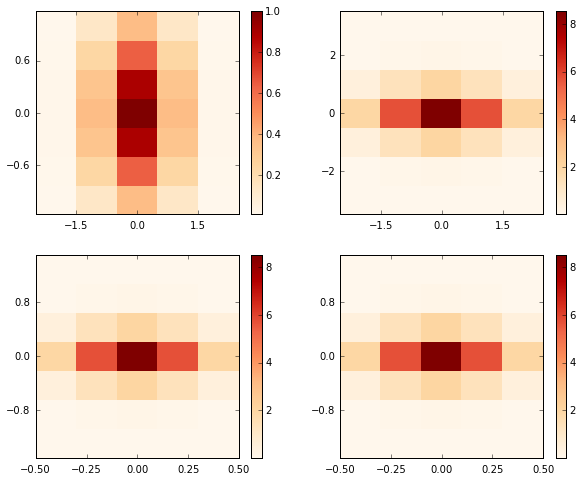

In [55]:
x,y=np.linspace(-2,2,5),np.linspace(-1,1,7)
# Natural ordered frequency grid
kx=np.fft.fftfreq(len(x),x[1]-x[0]);ky=np.fft.fftfreq(len(y),y[1]-y[0])

x,y=np.meshgrid(x,y,sparse=True)
a=np.exp(-(x**2+y**2))
a_ampspec=abs(np.fft.fft2(a))

# Using subplots here, will explain them later

# Actual function
plotc.colorplot(a,x=x,y=y,sp=221)
# Spectrum
plotc.spectrumplot(a_ampspec,sp=222);
# Spectrum with correct axes
plotc.spectrumplot(a_ampspec,x=kx,y=ky,sp=223);
# Equivalent colorplot implementation
plotc.colorplot(np.fft.fftshift(a_ampspec),x=np.fft.fftshift(kx),y=np.fft.fftshift(ky),sp=224)

plotc.figuresize(width=10,height=8)

##sphericalplot

This function is used to plot 2D data on a sphere. The data should be of the form f(theta,phi).

In [5]:
from scipy.special import sph_harm
#We use the convention theta-> co-latitude and phi-> longitude
theta=np.linspace(0,np.pi,100,endpoint=False)
phi=np.linspace(0,2*np.pi,100,endpoint=False)
Th,Ph=np.meshgrid(theta,phi)
Ylm=sph_harm(0,3,Ph,Th) #Note that sph_harm uses the opposite convention in (theta,phi), so we swap the order

Assuming latitude along axis 0 and longitude along axis 1.
If the plot looks all right you can safely ignore this warning.
Otherwise you might want to transpose your array.
Ignoring imaginary part


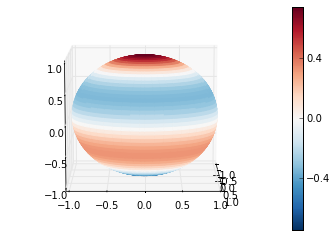

In [6]:
plotc.sphericalplot(Ylm.T);

Note that we transposed Ylm since sph_harm returns an array which has longitude along axis 0. Sphericalplot assumes the other convention, and it lets you know. Python's Qt plots allow you to rotate the sphere, zoom out etc. You can pass these as customization parameters, as we'll see later. If you don't want the warning message, you can switch it off by supplying the argument <font color='#006600'>warn</font>.

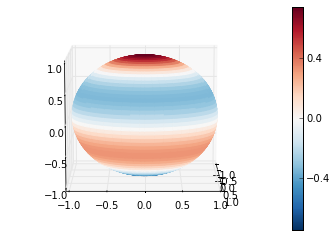

In [7]:
plotc.sphericalplot(Ylm.real.T,warn=False);

##quiver2D

Create a 2D vector plot from component fields using pyplot.quiver.

###Vortex

Start from a gaussian stream function 

$$\psi(x,y)=\exp(-\frac{x^2+y^2}{2\sigma^2})$$

and compute corresponding velocity field $\mathbf{u}=\nabla\times(\psi\hat{z})$

In [31]:
Nx=30;x=np.linspace(-5,5,num=Nx).reshape(1,Nx)
Ny=30;y=np.linspace(-5,5,num=Ny).reshape(Ny,1)

sigma=2
psi=np.exp(-(x**2+y**2)/(2*sigma**2))
ux=-y/(2*sigma**2)*psi
uy=x/(2*sigma**2)*psi

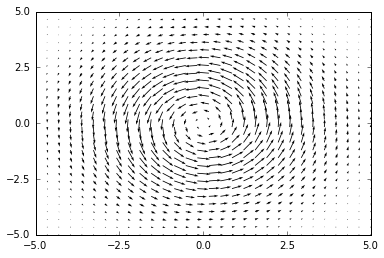

In [32]:
# We specify the x and y ranges. If we don't, default values will be used.
plotc.quiver2D(ux,uy,x=x,y=y);

##plot1D

This creates 1D plots using pyplot's plot.

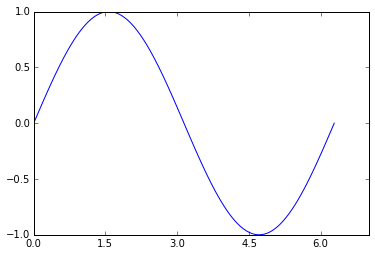

In [33]:
x=np.linspace(0,2*pi,100)
# We specify the x coordinates
plotc.plot1D(np.sin(x),x=x);

##draw_vlines

Draw vertical lines at the specified x coordinates. It uses axes.vlines, and accepts standard keywords.

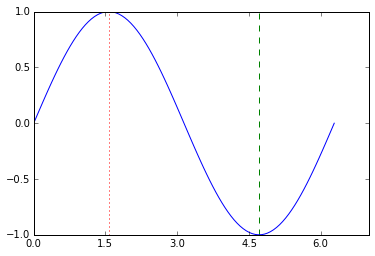

In [34]:
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x);
plotc.draw_vlines([np.pi/2,3*np.pi/2],colors=['r','g'],linestyles=['dotted','dashed']);

Note how it uses the pre-existing y-limits by default.

##draw_hlines

Draw horizontal lines at the specified y coordinates. It uses axes.hlines, and accepts standard keywords.

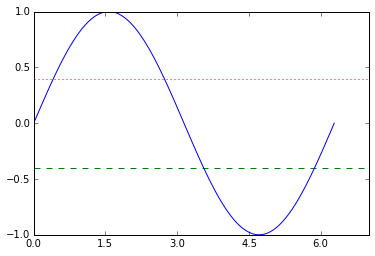

In [35]:
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x);
plotc.draw_hlines([0.4,-0.4],colors=['r','g'],linestyles=['dotted','dashed']);

##draw_rectangle

Draw a rectangle specified by the x and y coordinates. Uses patches.Rectangle and axes.add_patch to generate the rectangle.

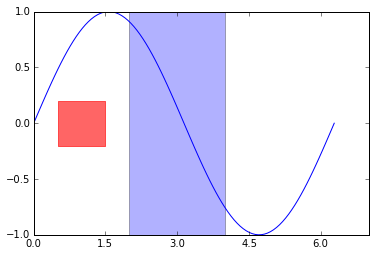

In [36]:
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x);
plotc.draw_rectangle(x=[0.5,1.5],y=[-0.2,0.2],alpha=0.6,color='r');
#If either one of the x and y coordinates are unspecified, it uses pre-existing values.
plotc.draw_rectangle(x=[2,4],alpha=0.3);

##fitsplot

Load a fits file and plot it using colorplot. Relies on the module pyfits, so you have to install it first.

In [14]:
# Usage: fitsplot('filename')

##figuresize

Adjust the size of the plot. Optionally specify units. Uses axes.set_size_inches. Possible units are inches, centimeters and millimeters; the default is inches.

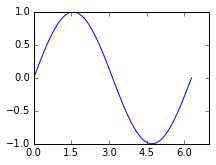

In [37]:
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x);
plotc.figuresize(width=8,height=6,unit='cm')

Note that this is the size of the entire figure including the bounding box. The size of the actual plot would be smaller.

#General Customization

Customization is always inline, as function argument. Often it is a bit verbose, but it's all for the sake of clarity.

## Subplot

It's quite easy to create subplots. There are several possible, although related, keywords which can be used, based on how lazy you're feeling at the moment. Possible keywords are <font color='#006600'>subplot_index</font>, <font color='#006600'>subplot</font> and <font color='#006600'>sp</font>.

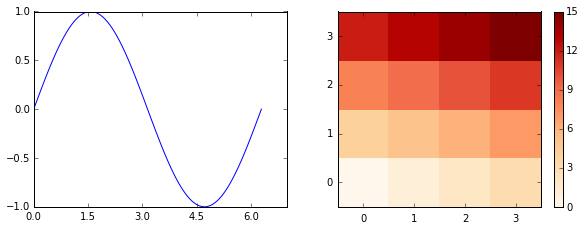

In [38]:
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x,sp=121);
plotc.colorplot(a,subplot=122);
plotc.figuresize(width=10,height=3.5)

##Gridlist

This is an easy way to create multiple subplots.

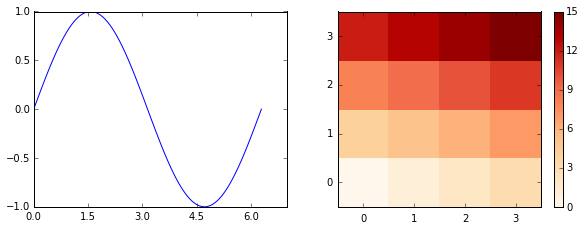

In [39]:
gl=plotc.gridlist(nrows=1,ncols=2)
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x,sp=next(gl));
plotc.colorplot(a,sp=next(gl));
plotc.figuresize(width=10,height=3.5)

##Plot ranges

Plot ranges can be set using the keywords <font color='#006600'>xlim</font> and <font color='#006600'>ylim</font> (or equivalently <font color='#006600'>xr</font> and <font color='#006600'>yr</font>). These have to be supplied inline as 2-element lists specifying the lower and upper limits. If either of the limits are set to <font color='blue'>None</font>, pre-existing values will be used.

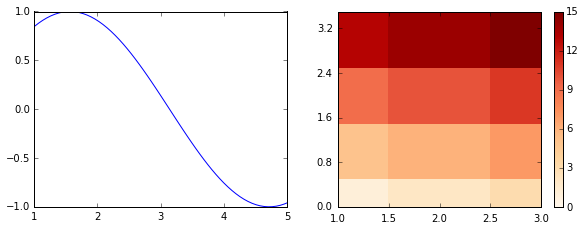

In [47]:
gl=plotc.gridlist(nrows=1,ncols=2)
x=np.linspace(0,2*pi,100)
plotc.plot1D(np.sin(x),x=x,sp=next(gl),xlim=[1,5]);
plotc.colorplot(a,sp=next(gl),ylim=[0,None],xlim=[1,3]);
# Note that the limit indicates the extreme edges. 
# Since the cell labels are placed at the cell center, this might lead to part of the cell being cut off,
# as is happening here. This can be remedied by setting the keyword xrpad and yrpad, as we see next.

plotc.figuresize(width=10,height=3.5)

##Axes Customization

Most of the functions accept many axes customization keywords. Arguments need to be supplied as a dictionary, as shown below.

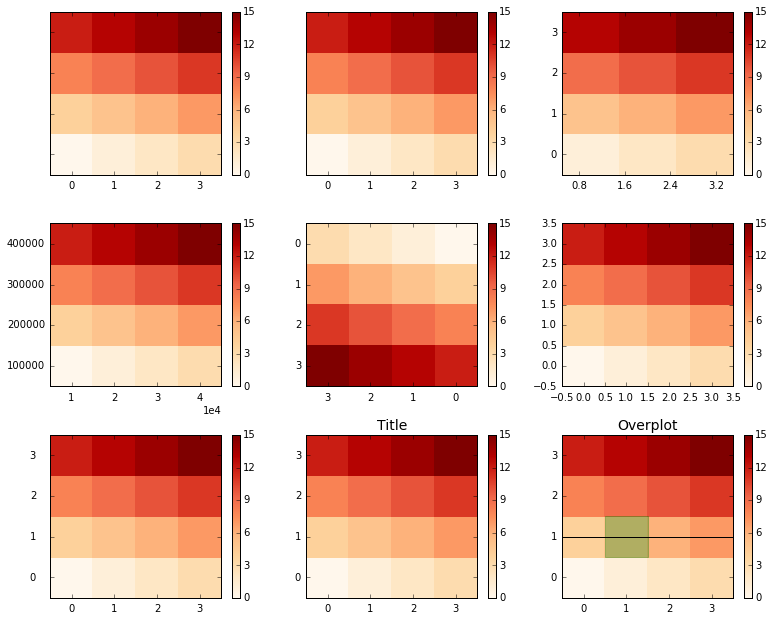

In [46]:
gl=plotc.gridlist(nrows=3,ncols=3)

# Ticks and tick labels can be hidden
plotc.colorplot(a,sp=next(gl),axes_properties=dict(hide_yticklabels=True));

plotc.colorplot(a,sp=next(gl),axes_properties=dict(hide_yticks=True));

# xrpad will pad the x range so that entire squares are visible. 
# yrpad will do the same for the y axis
#This might be necessary since the coordinates are centered on the box
plotc.colorplot(a,sp=next(gl),xlim=[1,3],axes_properties=dict(xrpad=True));

# Small and large numbers use scientific notation by default. This can be turned off as necessary
# The limits of scientific notation can be supplied as the keyword xscilimits or yscilimits.
# The default limits are (-3,3), so numbers below 10^-3 or above 10^3 will be represented using scientific notation.
x=[1e4,2e4,3e4,4e4]
y=[1e5,2e5,3e5,4e5]
plotc.colorplot(a,x=x,y=y,sp=next(gl),axes_properties=dict(y_sci=False,xscilimits=(-3,4)));

# Axes can be flipped
plotc.colorplot(a,sp=next(gl),axes_properties=dict(flipx=True,flipy=True));

# Tick locators are useful if you want to control which ticks you want
# Choose xtick_locator, ytick_locator or xytick_locator. The last options sets both the locators to the same value.
# Set locator_properties_x, locator_properties_y or locator_properties_xy
plotc.colorplot(a,sp=next(gl),axes_properties=dict(xytick_locator='max',\
                                                   locator_properties_xy=dict(nbins=10)));

# Tick labels can be padded with space. The default padding is 6.
plotc.colorplot(a,sp=next(gl),axes_properties=dict(ytickpad=15));

# You can add a title to the plot
plotc.colorplot(a,sp=next(gl),title="Title",title_properties=dict(fontsize=14));

# You can create multiple plots on the same axis (overplots)
# Save the axis from the first plot and pass it on to subsequent plots
ax,_=plotc.colorplot(a,sp=next(gl),title="Overplot",title_properties=dict(fontsize=14));
plotc.draw_hlines(ax=ax,y=[1])
plotc.draw_rectangle(ax=ax,x=[0.5,1.5],y=[0.5,1.5],alpha=0.3,color='g')



plotc.figuresize(width=13,height=10.5)
plotc.plt.subplots_adjust(hspace=0.3)

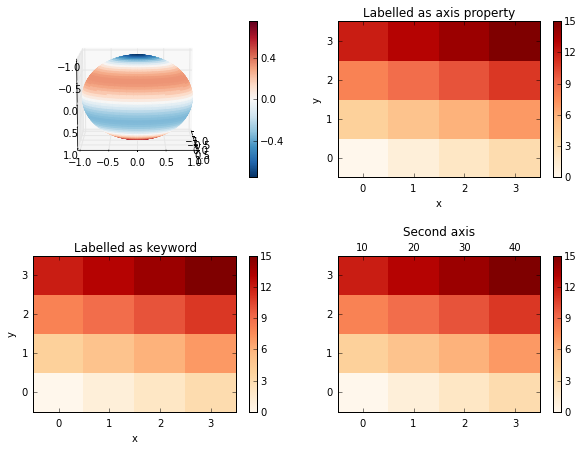

In [52]:
gl=plotc.gridlist(nrows=2,ncols=2)

# In 3D plots it is possible to flip the z axis as well
Ylm=sph_harm(0,3,Ph,Th)
plotc.sphericalplot(Ylm.real.T,sp=next(gl),warn=False,axes_properties=dict(flipz=True))


# Labels can be set inline, using xlabel or xl, and ylabel or yl
plotc.colorplot(a,sp=next(gl),axes_properties=dict(xlabel='x',yl='y'),title="Labelled as axis property");

# Labels can also be set as keyword arguments to the main function
plotc.colorplot(a,sp=next(gl),xlabel='x',ylabel='y',title="Labelled as keyword");

# It's easy to introduce a second axis
x2=[10,20,30,40]
plotc.colorplot(a,sp=next(gl),x2=x2,title="Second axis",title_properties=dict(y=1.1));

plotc.figuresize(width=10,height=7)
plotc.plt.subplots_adjust(hspace=0.5)

##Colormap customization

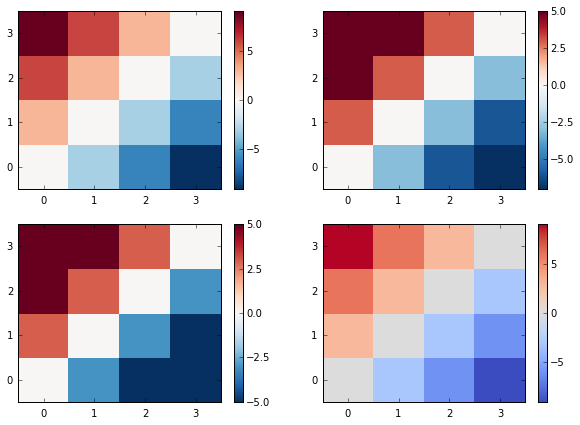

In [53]:
gl=plotc.gridlist(nrows=2,ncols=2)

# Default palette to compare with
plotc.colorplot(a-a.T,sp=next(gl));

# You can saturate the colormap if you don't want large values swamping small ones
# The maximum and minimum limits are set using the keywords vmax and vmin 
plotc.colorplot(a-a.T,sp=next(gl),vmax=5,vmin=-7);

# If you want the colormap to be symmetric about zero, it is convenient to use the keyword centerzero
plotc.colorplot(a-a.T,sp=next(gl),vmax=5,centerzero=True);

# If you don't like the default colormap, you can specify one using the keyword cmap
# This is a standard pcolormesh property
plotc.colorplot(a-a.T,sp=next(gl),cmap='coolwarm');

plotc.figuresize(width=10,height=7)

## Colorbar Customization

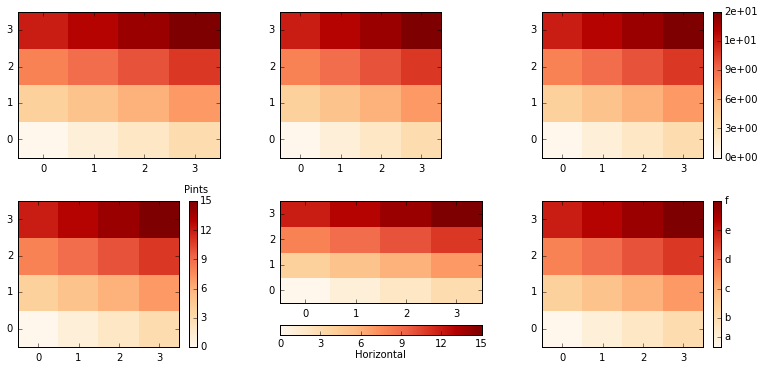

In [54]:
gl=plotc.gridlist(nrows=2,ncols=3)

# Don't plot colorbar. The plot size will differ from that with a colorbar.
plotc.colorplot(a,sp=next(gl),colorbar=False);

# Set the colorbar invisible if you don't want it but want to retain the size of the plot
plotc.colorplot(a,sp=next(gl),colorbar_properties=dict(visible=False));

# Use scientific notation on colorbar
plotc.colorplot(a,sp=next(gl),colorbar_properties=dict(scientific=True));

# Add a title to colorbar. This is added as an axis.text object.
# Positioning is not perfect, and you might need to adjust the xy coordinates of the text.
plotc.colorplot(a,sp=next(gl),colorbar_properties=dict(title="Pints",\
                                                       title_properties=dict(fontsize=10)));

# Horizontal colorbars are possible as well, as usual
plotc.colorplot(a,sp=next(gl),colorbar_properties=dict(orientation='horizontal',title="Horizontal"));

# We can choose where to place the ticks, and what to call them
plotc.colorplot(a,sp=next(gl),colorbar_properties=dict(ticks=[1,3,6,9,12,15],\
                                                       ticklabels=['a','b','c','d','e','f']));

plotc.figuresize(width=13,height=6)
plotc.plt.subplots_adjust(hspace=0.3,wspace=0.3)

## Sphericalplot configurations

These are special configuration options related to spherical plots. These mainly have to do with the orientation of the sphere.

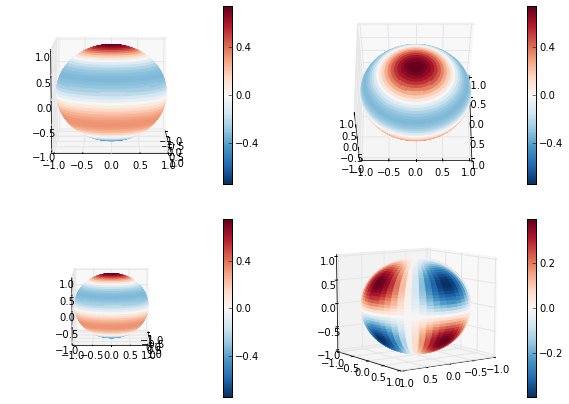

In [55]:
gl=plotc.gridlist(nrows=2,ncols=2)

Ylm=sph_harm(0,3,Ph,Th)
# Default view to compare with
plotc.sphericalplot(Ylm.real.T,sp=next(gl),warn=False);

# Tilt the sphere in latitude
plotc.sphericalplot(Ylm.real.T,sp=next(gl),warn=False,sphere_properties=dict(elev=60));

# Zoom in or out. The default distance is 10. Increasing the distance makes the sphere smaller.
plotc.sphericalplot(Ylm.real.T,sp=next(gl),warn=False,sphere_properties=dict(dist=15));

Ylm=sph_harm(2,3,Ph,Th)
# Change the azimuth of viewing. The default azimuth is chosen such that the maximum value is visible front on.
plotc.sphericalplot(Ylm.real.T,sp=next(gl),warn=False,sphere_properties=dict(azim=55));

plotc.figuresize(width=10,height=7)

##Quiver2D configurations

In [56]:
Nx=30;x=np.linspace(-5,5,num=Nx).reshape(1,Nx)
Ny=30;y=np.linspace(-5,5,num=Ny).reshape(Ny,1)

sigma=2
psi=np.exp(-(x**2+y**2)/(2*sigma**2))
ux=-y/(2*sigma**2)*psi
uy=x/(2*sigma**2)*psi

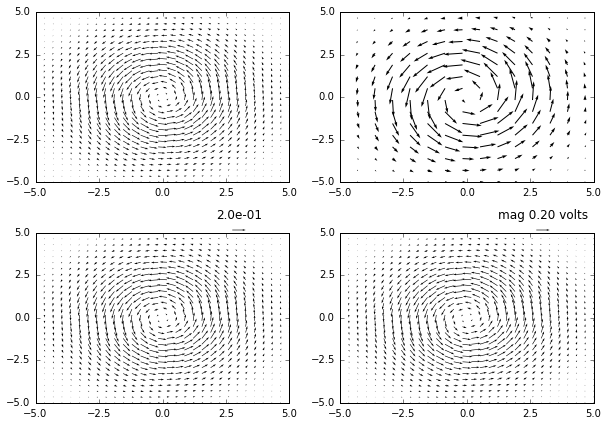

In [57]:
gl=plotc.gridlist(nrows=2,ncols=2)

# Default view for comparison
plotc.quiver2D(ux,uy,x=x,y=y,sp=next(gl));

# Skip points along x and y by specifying the keyword 'every'
plotc.quiver2D(ux,uy,x=x,y=y,sp=next(gl),every=[2,2]);

# Add a key. It uses scientific notation by default, which can be turned off using the keyword sci.
# Set the scale as you want.
plotc.quiver2D(ux,uy,x=x,y=y,sp=next(gl),key=True,key_properties=dict(fontsize=12,scale=0.2));

# You can choose the key format, and add text to the key
plotc.quiver2D(ux,uy,x=x,y=y,sp=next(gl),key=True,\
               key_properties=dict(fontsize=12,scale=0.2,fmt='{:3.2f}',prefix="mag ",suffix=" volts"));

plotc.figuresize(width=10,height=7)

plotc.plt.subplots_adjust(hspace=0.3)

##Latex

You can specify whether or not to use latex rendering. Latex rendering takes a considerably longer time, so you might want to use it only if you are satisfied with the plot. The following settings are applied:

'font.family':'serif', <br>
'font.serif':'Helvetica', <br>
'text.usetex':True

These are however wrapped around axes.draw for each subplot, so they don't alter the global rcParams. This means that you can have multiple subplots, some using latex and some not using it.

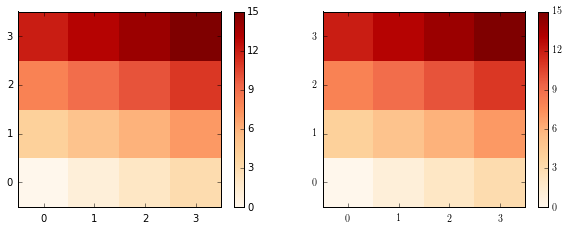

In [59]:
gl=plotc.gridlist(nrows=1,ncols=2)

# Without latex
plotc.colorplot(a,sp=next(gl));

# With latex
plotc.colorplot(a,sp=next(gl),usetex=True);

plotc.figuresize(width=10,height=3.5)